<a href="https://colab.research.google.com/github/fbaertl/Applied_Data_science_CAS_2022/blob/main/Module3/CAS_M3_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The goal of this notebook is to use supervised machine learning to categorise a set of images.

In [ ]:
#Import the needed libraries
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn import metrics

from matplotlib import  pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import os
from imageio import imread
import pandas as pd
from time import time as timer

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

In [ ]:
#Install dtreeviz for decision tree visualisations
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 854 kB/s 


In [ ]:
from dtreeviz.trees import dtreeviz

In [ ]:
#Get CIFAR10 data from our source: https://keras.io/api/datasets/cifar10/
cifar10 = tf.keras.datasets.cifar10

#tf.keras.datasets.cifar10.load_data() ##Optional to take a look at the data

In [ ]:
#Giving the classes names
cifar10_class_names = ['airplane', 'automobile', 'bird', 'cat', 
                       'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Categories' , cifar10_class_names)
#Load the data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Categories ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


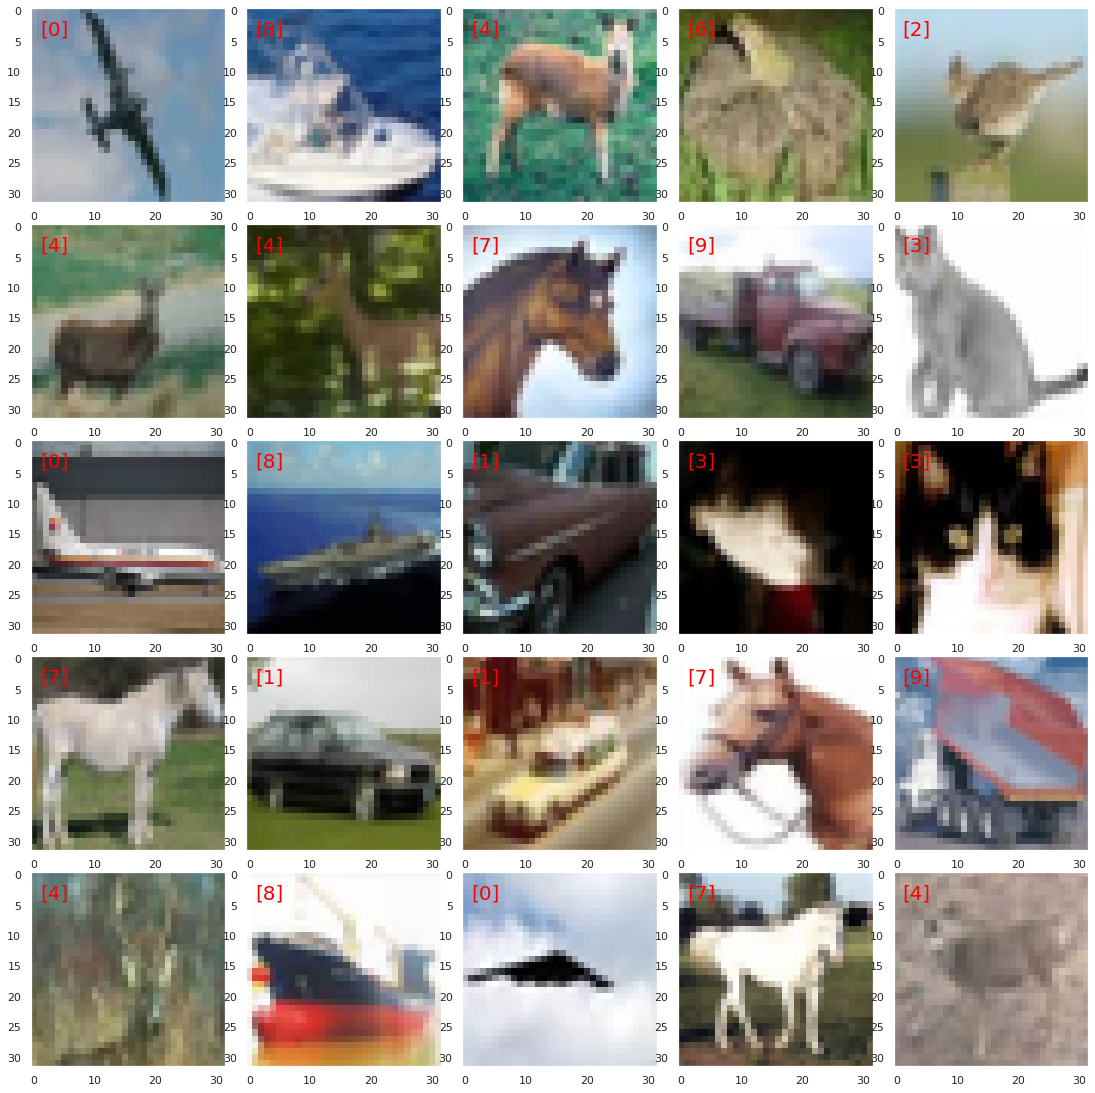

In [ ]:
#Taking a look at a few samples

n = 5
fig, ax = plt.subplots(n, n, figsize=(3*n, 3*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = train_images[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='red', size=20)
    ##Optional to indicate the class of the image
  axi.grid(False)
plt.tight_layout(0,0,0)

In [ ]:
# Reshaping 2-d images to 1-d arrays for use in scikit-learn

n_train = len(train_labels)
x_train = train_images.reshape((n_train, -1))
y_train = train_labels

n_test = len(test_labels)
x_test = test_images.reshape((n_test, -1))
y_test = test_labels

y_train.shape

(50000, 1)

In [ ]:
x_train.shape

(50000, 3072)

Using a random forest classifier

In [ ]:
# Creating the classifier

n_est = 200

dtc = ensemble.RandomForestClassifier(max_depth=700, 
                                      n_estimators=n_est, 
                                      max_leaf_nodes=500)

In [ ]:
# Fitting the model

t1 = timer()
dtc.fit(x_train, y_train)
t2 = timer()
print ('Training time: %.1fs'%(t2-t1))

<ipython-input-23-777422b05c3d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dtc.fit(x_train, y_train)


Training time: 326.2s


In [ ]:
# Evaluating the accuracy of our model on the train and test datasets

print("Training score : %.3f (n_est=%d)" 
      % (dtc.score(x_train, y_train), n_est))
print("Test score : %.3f (n_est=%d)" 
      % (dtc.score(x_test, y_test), n_est))

Training score : 0.591 (n_est=200)
Test score : 0.431 (n_est=200)


In [ ]:
# Creating the classifier (Version 2)

n_est = 500

dtc2 = ensemble.RandomForestClassifier(max_depth=5000, 
                                      n_estimators=n_est, 
                                      max_leaf_nodes=1000)

In [ ]:
# Fitting the model2

t1b = timer()
dtc2.fit(x_train, y_train)
t2b = timer()
print ('Training time: %.1fs'%(t2b-t1b))

<ipython-input-40-4ed1f85d580c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dtc2.fit(x_train, y_train)


Training time: 1091.5s


In [ ]:
# Evaluating the accuracy of our model on the train and test datasets - Version 2 

print("Training score : %.3f (n_est=%d)" 
      % (dtc2.score(x_train, y_train), n_est))
print("Test score : %.3f (n_est=%d)" 
      % (dtc2.score(x_test, y_test), n_est))

Training score : 0.737 (n_est=500)
Test score : 0.453 (n_est=500)
